# RCES Final Project


In [151]:
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

# Import the data

## Mercury Deposition

The CSV files were downloaded from the Mercury Deposition Network (National Atmospheric Deposition Program):
- "mdn_a" dataset contains the annual Hg Deposition (HgDep [μg/m^2]) from 1996 to 2021 (only complete data)
- "mdn_w" dataset contains the weekly Hg Deposition from (HgDep [ng/m^2])1996 to 2021 (only valid data)
- "mdn" dataset contains the site information for the 84 stations from the Mercury Deposition Network accross the US (including Inactive sites).

In [160]:
# Import Annual Hg Deposition from Mercury Deposition Network
mdn_a= pd.read_csv('MDN-ALL-A-s.csv') 

# Set the Site ID as an index
mdn_ai=mdn_a.set_index("siteid") 
#mdn_ai

In [161]:
# Import Weekly Hg Deposition from Mercury Deposition Network
mdn_w= pd.read_csv('MDN-ALL-W-s.csv') #Load as Dataframe  Mercury Deposition Network

# Set the Site ID as an index
mdn_wi=mdn_w.set_index("siteID")
#mdn_wi

In [162]:
# Import site information from Mercury Deposition Network
mdn= pd.read_csv('mdn.csv') #Load as Dataframe  Mercury Deposition Network

# Set the Site ID as an index
mdn_i=mdn.set_index("siteId")
#mdn_i

In [163]:
mdn_annual=mdn_ai.join(mdn_i, how="outer")
#mdn_annual

In [164]:
mdn_weekly=mdn_wi.join(mdn_i, how="outer")
#mdn_weekly # use only weekly data?

## Mercury in soils

The CSV files were downloaded from the Geochemical and Mineralogical Data for Soils of the Conterminous United States:
- 'Top 5' dataset contains the geochemical characterization first 5 cm, including Hg [mg/kg] collected during 2007-2011.
- 'Ahorizon' dataset contains the geochemical chatacterization A horizon, including Hg [mg/kg] collected during 2007-2011.
- 'Bhorizon' dataset contains the geochemical chatacterization B horizon, including Hg [mg/kg] collected during 2007-2011.

In [186]:
# Import Top 5cm Hg content in soils from USGS
Top5= pd.read_csv('Top5_soil.csv') 

# Set the Site ID as an index
Top5_i=Top5.set_index("SiteID") 
#Top5_i

In [187]:
# Import Top 5cm Hg content in soils from USGS
Ahorizon= pd.read_csv('Ahorizon_soil.csv') 

# Set the Site ID as an index
Ahorizon_i=Ahorizon.set_index("SiteID") 
#Ahorizon_i

In [188]:
# Import Top 5cm Hg content in soils from USGS
Chorizon= pd.read_csv('Chorizon_soil.csv') 

# Set the Site ID as an index
Chorizon_i=Chorizon.set_index("SiteID") 
#Chorizon_i

## Figure 1. Mercury Deposition Network and Soil monitoring sites

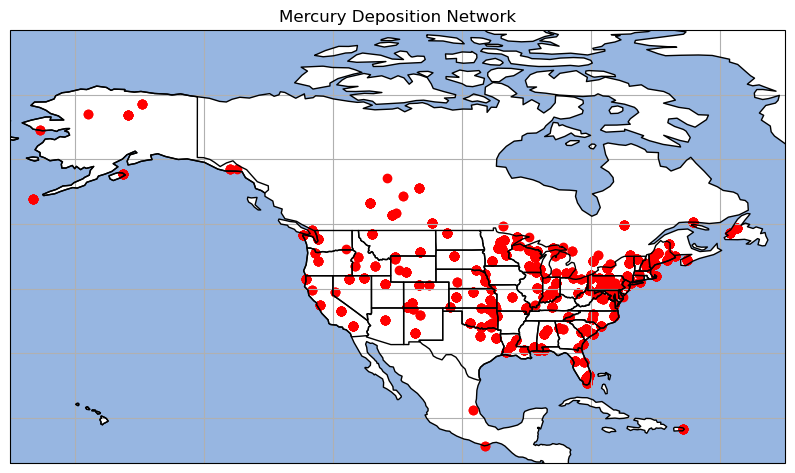

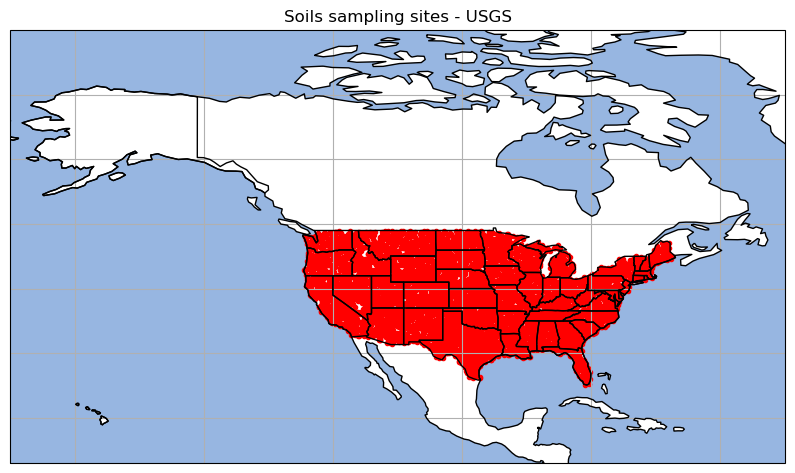

In [189]:
# visualize Mercury Deposition Network and Mercury in soils monitoring sites

# define map extent
extent = [-170, -50, 13, 80]

# plot
fig, ax1 = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.PlateCarree()}) #plt.figure(figsize=(12, 6))
# setup map
ax1.set_extent(extent, ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=9)
ax1.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
ax1.add_feature(cfeature.OCEAN)

# Plot monitoring sites Mercury deposition
status=mdn_annual.status # how to color Active or Inactive??
mdn_map=ax1.scatter(mdn_annual.longitude,mdn_annual.latitude,color='red', transform=ccrs.PlateCarree())

# decorate
ax1.set_title('Mercury Deposition Network')
ax1.gridlines()

# plot 
fig, ax2 = plt.subplots(figsize=(10,6), subplot_kw={'projection':ccrs.PlateCarree()})
ax2.set_extent(extent, ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=9)
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
ax2.add_feature(cfeature.OCEAN)

# Plot sampling sites Mercury in soils
soil_map=ax2.scatter(Top5_i.Longitude,Top5_i.Latitude,color='red', marker='.', transform=ccrs.PlateCarree())

# decorate
ax2.set_title('Soils sampling sites - USGS')
ax2.gridlines()

#plt.savefig('figures/1mercurydepositionnetwork.png')

In [136]:
#scipy.interpolate.griddata buscar en web